In [ ]:
import numpy as np
from package1 import energie
from package1 import valori_teorici
import matplotlib.pyplot as plt

In [352]:
g=9.81
L=1
M=1

data = np.loadtxt('consegna_extra/out_pendolo0_1.csv')

time = data[:,1]
theta = data[:,2]
omega=data[:,3]
alpha=data[:,4]

thetaTh=[]
omegaTh=[]

en_cinetica=[]
en_potenziale=[]
energia_totale=[]

for t in time:
    thetaTh.append(valori_teorici.theta_teorico(theta[0], omega[0], g, L, t))
    omegaTh.append(valori_teorici.omega_Teorico(theta[0], omega[0], g, L, t))  

e=[]

for i in range(0, len(theta)):
    e.append((thetaTh[i]-theta[i])/max(thetaTh))
    en_cinetica.append(energie.energia_cinetica(omega[i], M, L))
    en_potenziale.append(energie.energia_potenziale(theta[i],g, M, L))
    energia_totale.append(en_cinetica[i]+en_potenziale[i])

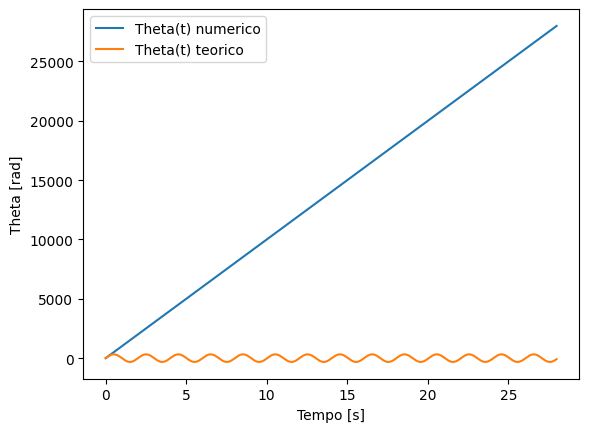

In [353]:
plt.plot(time, theta, label="Theta(t) numerico")
plt.plot(time, thetaTh, label="Theta(t) teorico")
plt.ylabel("Theta [rad]")
plt.xlabel("Tempo [s]")
plt.legend()

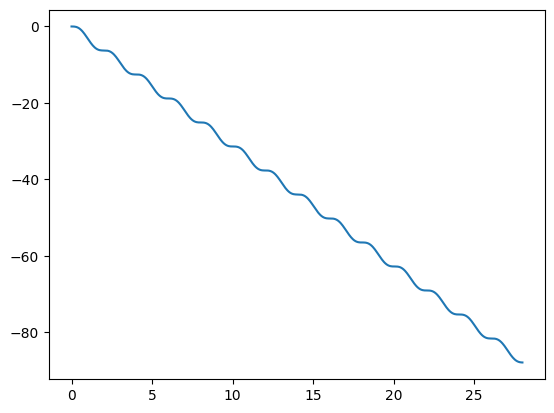

In [354]:
plt.plot(time, e)

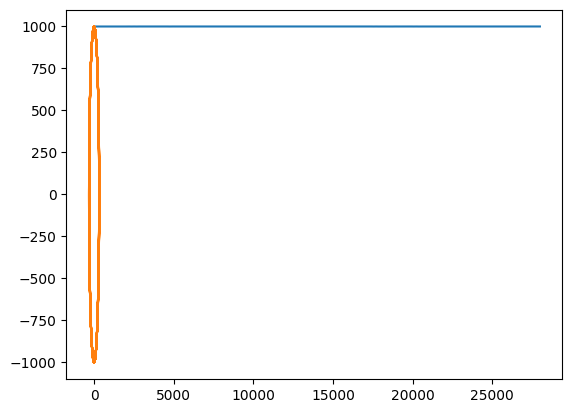

In [355]:
plt.plot(theta, omega)
plt.plot(thetaTh, omegaTh, '-')

[np.float64(500000.03710253374), np.float64(499865.54193881946), np.float64(499920.442389849), np.float64(499982.46241962194), np.float64(499844.6011688993), np.float64(499965.42180167866), np.float64(499943.43145767483), np.float64(499852.05648227996), np.float64(499994.73921076325), np.float64(499896.4562099212), np.float64(499885.05197922094), np.float64(499998.35802260804), np.float64(499858.5257976459), np.float64(499931.2291957636), np.float64(499975.04785175127), np.float64(499843.6709895158), np.float64(499973.8526944029), np.float64(499932.7427797601), np.float64(499857.53996521526), np.float64(499997.9163923918), np.float64(499886.3433617133), np.float64(499894.8713784544), np.float64(499995.21526599565), np.float64(499852.69909804617), np.float64(499941.79324787157), np.float64(499966.5975635546), np.float64(499844.2623268783), np.float64(499981.3706306004), np.float64(499921.952971053), np.float64(499864.39398567355), np.float64(499999.81243397045), np.float64(499877.059506

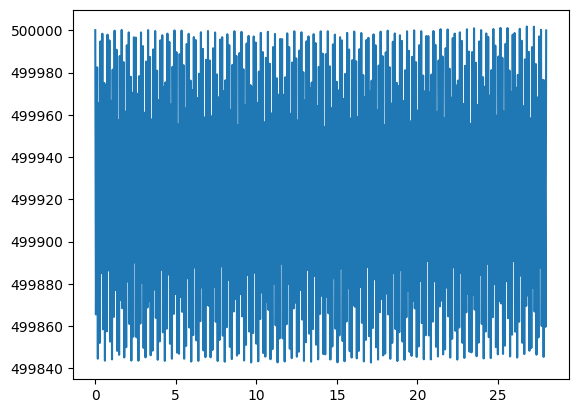

In [356]:
energia_totale_teorica=energie.energia_cinetica(omega[0], M, L)+energie.energia_potenziale(theta[0], g, M,L)
plt.plot(time, energia_totale)

print(energia_totale)
print(energia_totale_teorica)
print((max(energia_totale)-min(energia_totale))/max(energia_totale))
